In [1]:
import numpy as np
from numpy import loadtxt
from itertools import groupby
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def storms_by_threshold(speeds: pd.Series, threshold: float): # denotes that this function takes in a series
    above = False
    for index, speed in enumerate(speeds):
        if not above and (speed >= threshold):
            above = True
            start = index

        if above and (speed < threshold):
            above = False
            yield speeds[start: index]

    if above:
        yield speeds[start: index]

In [3]:
Apr22_10m = np.loadtxt("April22_10m.txt", delimiter=",", unpack=True, skiprows=1, usecols=(1,2), dtype=str)
# make speeds into floats
d = Apr22_10m[1]
winddata = d.astype(float)
print(Apr22_10m[1])
print(winddata)
print(len(winddata))

df = pd.read_csv('April22_10m.txt')
df = df.rename(columns={'Avg Wind Speed @ 10m [m/s]': 'Speed'})

# Just the first 1000 for fast testing
# df = df.iloc[0:2000]
print(df)

['4.724' '3.272' '2.951' ... '1.177' '1.278' '1.332']
[4.724 3.272 2.951 ... 1.177 1.278 1.332]
43200
      DATE (MM/DD/YYYY)    MST  Speed
0              4/1/2022  00:00  4.724
1              4/1/2022  00:01  3.272
2              4/1/2022  00:02  2.951
3              4/1/2022  00:03  3.288
4              4/1/2022  00:04  3.642
...                 ...    ...    ...
43195         4/30/2022  23:55  1.456
43196         4/30/2022  23:56  1.443
43197         4/30/2022  23:57  1.177
43198         4/30/2022  23:58  1.278
43199         4/30/2022  23:59  1.332

[43200 rows x 3 columns]


In [4]:
thresholds = np.arange(4.5, 50, 1) # speeds  #1 m/s increments

threshold_counts = [df['Speed'][df['Speed']>threshold].count() for threshold in thresholds]

In [5]:
threshold_counts

[15449,
 11805,
 9160,
 7241,
 5684,
 4377,
 3290,
 2418,
 1799,
 1313,
 915,
 608,
 379,
 239,
 114,
 56,
 27,
 11,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
speed_thresholds = np.arange(4, 16, 0.5)
duration_thresholds = np.arange(5, 61, 1)

S, T = np.meshgrid(speed_thresholds, duration_thresholds)

Z = np.zeros(S.shape).flatten()

for index, (speed_threshold, duration_threshold) in enumerate(zip(S.ravel(), T.ravel())):
    Z[index] = sum(
        1 for storm in storms_by_threshold(df['Speed'], speed_threshold) if len(storm) > duration_threshold)

In [7]:
Z = Z.reshape(S.shape)
Z[1][-1] # 14 storms of > 4.5m/s for one hour
Z

array([[424., 382., 327., ...,  31.,  25.,  18.],
       [363., 327., 285., ...,  28.,  21.,  14.],
       [324., 284., 248., ...,  25.,  16.,  12.],
       ...,
       [ 51.,  43.,  40., ...,   1.,   1.,   1.],
       [ 50.,  42.,  38., ...,   1.,   1.,   1.],
       [ 50.,  42.,  37., ...,   1.,   1.,   1.]])

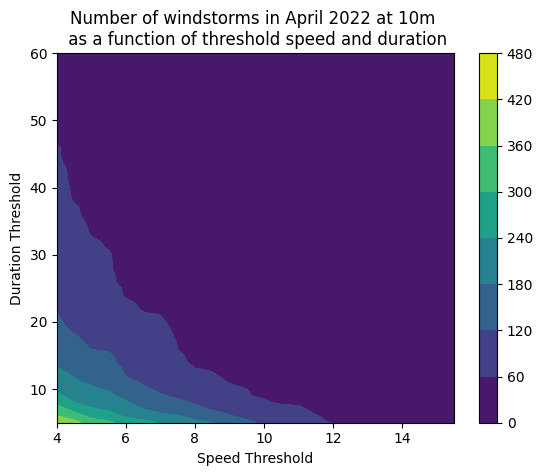

In [8]:
Z = Z.reshape(S.shape)
plt.contourf(S, T, Z)
# plt.imshow(Z, cmap='hot')
plt.ylabel('Duration Threshold')
plt.xlabel('Speed Threshold')
plt.title('Number of windstorms in April 2022 at 10m \n as a function of threshold speed and duration')
plt.colorbar()
plt.savefig('Ap_min_10m_storms_contour.pdf')
plt.show()

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

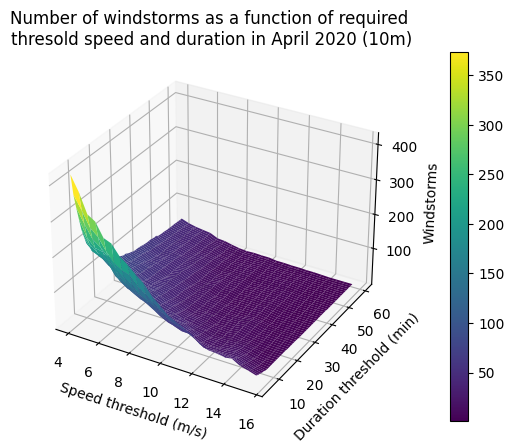

In [99]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(S, T, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Number of windstorms as a function of required \nthresold speed and duration in April 2020 (10m)')
ax.set_xlabel('Speed threshold (m/s)')
ax.set_ylabel('Duration threshold (min)')
ax.set_zlabel('Windstorms');
fig.colorbar(surf, orientation="vertical", pad=0.11)

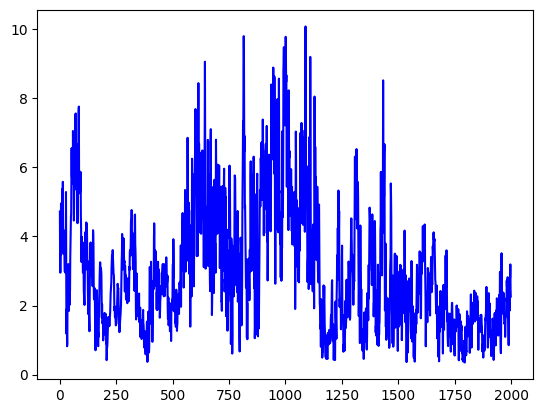

0       4.724
1       3.272
2       2.951
3       3.288
4       3.642
        ...  
1995    2.767
1996    2.810
1997    3.191
1998    2.472
1999    2.259
Name: Speed, Length: 2000, dtype: float64